In [10]:
import numpy as np
from matplotlib import pyplot as plt
from imageio import imread

import time

Let's do some setup and  load in image 

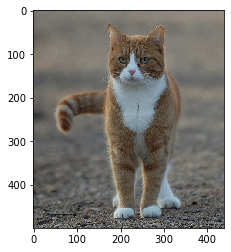

Image size: (500, 439, 3)


In [11]:
img = imread('cat.png')/255 # each pizel is 1 byte or 8 bits so has a value range 0-255 of 2^8 = 256 values so /255 normalizes matrix
#plt.figure()
plt.imshow(img)
plt.show()
start = time.time()
#out1 = sobel_filter(img)
#out2 = blur_filter(img)
#print('Calculation time:', time.time()-start, 'sec')
print('Image size:',img.shape)


Now, implement convolution of image of NxM pixels and C spectral bands (C=3 for a RGB image) 
with a filter kernel of size Nk x Mk. THis image has 500*439pixels and 3 band since it is a colour image. 

To compute the result of pixel (i,j,c), place the filter kernel at pixel (i,j,c) and multiply the image and the filter at all locations where the filter overlaps the image, then sum the result. 
This sum can be computed using np.sum, or you can use 2 for-loops (this will be slower).

To compute the result of all pixels we need a for loop over all the indexes, in this case three for loops over image width (N), height (M) and number of channels (C). 

In this example we compute convolution only at those pixels where the filter kernel fits inside the image. 

First, implement convolution_loops where you in addition to the 3 outer loops also loop over the filter kernel.  See lecture notes for formula. 


In [37]:
def convolution_loops(image, kernel):
    """
    Write a general function to convolve an image with an arbitrary kernel.
    """
    out = np.zeros(image.shape)
    
    kernel = kernel[::-1,::-1]
    N, M, C = image.shape
    Nk, Mk = kernel.shape
    
    Nk_2 = Nk//2 # since s and t run from -a...a and -b...b
    Mk_2 = Mk//2
    
    for c in range(C):
        for i in range(Nk_2, N - Nk_2):
            for j in range(Mk_2, M - Mk_2):
                currsum = 0
                for k in range(-Nk_2, Nk_2 + 1):
                    for l in range(-Mk_2, Mk_2 + 1):
                        currsum += image[i-k, j-l,c]*kernel[k,l]
                out[i,j,c] = currsum
    return out
#for some reason this gies the wrong result...?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


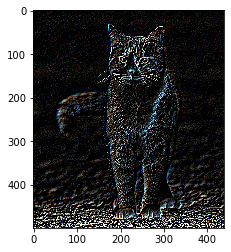

In [38]:
kernel_1 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
new_img = convolution_loops(img, kernel_1)
plt.imshow(new_img)

Now, replace the loop over the filter kernel by using either np.sum or np.dot (the latter after reshaping the current subwindow and the filter into a 1D vectors of length (1,Nk*Mk) 

In [25]:
def convolution(image, kernel):
    """
    Write a general function to convolve an image with an arbitrary kernel.
    """
    out = np.zeros(image.shape)        
    kernel = kernel[::-1,::-1]
    N, M, C = image.shape
    Nk, Mk = kernel.shape
    
    Nk_2 = Nk//2 # since s and t run from -a...a and -b...b
    Mk_2 = Mk//2
    
    for i in range(Nk_2, N - Nk_2):
        for j in range(Mk_2, M - Mk_2):
            for c in range(C):
                out[i,j,c] = np.sum(np.multiply(image[i-Nk_2:i+Nk_2+1, j-Mk_2:j+Mk_2+1,c],kernel)) 
    return out

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


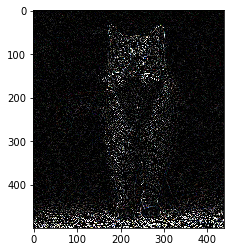

In [36]:
#getting scipy's result for comparison
from scipy import ndimage
test=np.zeros_like(img)
test[:,:,0] = ndimage.convolve(img[:,:,0], kernel_1)
test[:,:,1] = ndimage.convolve(img[:,:,1], kernel_1)
test[:,:,2] = ndimage.convolve(img[:,:,2], kernel_1)
plt.imshow(test)

In [41]:
test[200,200,1]

-0.015686274509803977

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


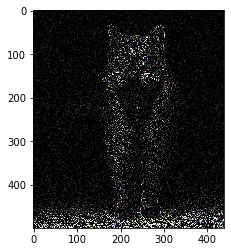

In [33]:
# my result, same as scipys
kernel_1 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
new_img2 = convolution(img, kernel_1)
plt.imshow(new_img2)

In [42]:
new_img2[200,200,1]

-0.015686274509803533

Calculation time loops: 33.497414112091064 sec
Calculation time without inner lopps: 3.205202102661133 sec


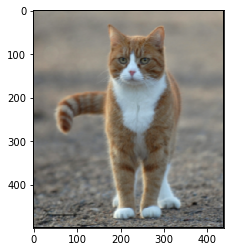

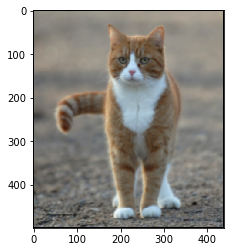

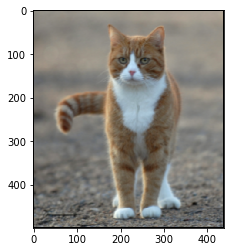

In [43]:
# CHeck that your image looks correct with a given artbitraty filter
img = plt.imread('cat.png')

kernel = np.arange(25).reshape((5, 5))

start= time.time()
out1 = convolution_loops(img, kernel)

#out1 = sobel_filter(img)
#out2 = blur_filter(img)
print('Calculation time loops:', time.time()-start, 'sec')

start= time.time()
out2 = convolution(img, kernel)

#out1 = sobel_filter(img)
#out2 = blur_filter(img)
print('Calculation time without inner lopps:', time.time()-start, 'sec')


out1 -= out1.min()
out1 /= out1.max()
out2 -= out2.min()
out2 /= out2.max()



correct = plt.imread('convolution_cat.png')[:, :, :3]
plt.figure()
plt.imshow(correct, vmin=correct.min(), vmax=correct.max(), cmap='gray')
plt.figure()
plt.imshow(out1, vmin=out1.min(), vmax=out1.max())
plt.show()
plt.figure()
plt.imshow(out2, vmin=out2.min(), vmax=out2.max())
plt.show()


In [46]:
def blur_filter(img):
    """
    Use your convolution function to filter your image with an average filter (box filter)
    with kernel size of 11. The filter should have coefficients 1/(k_size*k_size)
    """
    k_size = 11
    kernel = np.ones((k_size, k_size))/k_size**2
    return convolution(img, kernel)


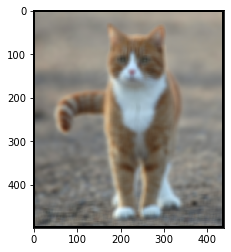

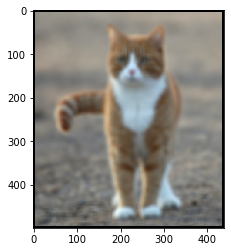

In [47]:
# Check your blurred image 
img = plt.imread('cat.png').astype(np.float) / 255
out = blur_filter(img)
out -= out.min()
out /= out.max()

correct = plt.imread('blur_cat.png')[:, :, :3]
plt.figure()
plt.imshow(correct, vmin=correct.min(), vmax=correct.max(), cmap='gray')
plt.figure()
plt.imshow(out, vmin=out.min(), vmax=out.max())
plt.show()

In [49]:
def sobel_filter(img):
    """
    Use your convolution function to filter your image with a vertical sobel kernel to find vertical edges
    """
    sobel_y = [[1, 2, 1],
            [0, 0, 0],
            [-1, -2, -1]]
    sobel_x = [[1, 0, -1 ],
            [2, 0, -2],
            [1, 0, -1]]
    sobel_y = np.array(sobel_y)
    sobel_x = np.array(sobel_x)
    convX = convolution(img, sobel_x)
    convY = convolution(img, sobel_y)
    convImg = np.sqrt(convX**2+convY**2)

    return convImg





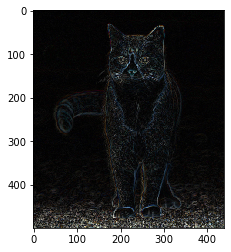

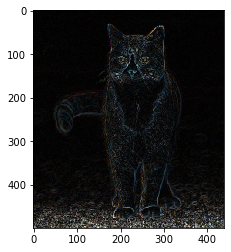

In [50]:
# Check the sobel image 
out = sobel_filter(img)
out -= out.min()
out /= out.max()
correct = plt.imread('sobel_cat.png')[:, :, :3]
plt.figure()
plt.imshow(correct, vmin=correct.min(), vmax=correct.max(), cmap='gray')
plt.figure()
plt.imshow(out, vmin=out.min(), vmax=out.max())
plt.show()